In [46]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle
import joblib

In [11]:
path1=r"D:\my_git\Handwriting-Recognition\Data\mnist_test.csv"
path2=r"D:\my_git\Handwriting-Recognition\Data\mnist_train.csv"

test_data=pd.read_csv(path1)
train_data=pd.read_csv(path2)


In [12]:
df=pd.concat([test_data,train_data],axis=0)

In [13]:
y=df['label']

In [14]:
df.reset_index(drop=True,inplace=True)

In [15]:
y=df['label']

In [16]:
x=df.drop(columns='label')

In [17]:
def missingvalues(ms):
    if ms.any():
        print("Missingvalue found")
        print(ms)
    else:
        print("Missing values not found")

In [18]:
missingvalues(x.isnull().sum())

Missing values not found


In [19]:
missingvalues(y.isnull().sum())

Missing values not found


In [20]:
# converting the X to numpy array so the we can display the image 
X=x.to_numpy()
type(X)
y=y.to_numpy()

In [21]:
# Y have a 0 to9 numbers 
print(np.unique(y))

[0 1 2 3 4 5 6 7 8 9]


In [22]:
def display_img(index):
    fig,ax=plt.subplots(figsize=(2,2))
    ax.imshow(X[index].reshape(28,28),cmap='gray')
    ax.axis('off')
    ax.set_title(y[index])

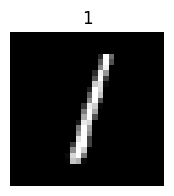

In [23]:
display_img(2)

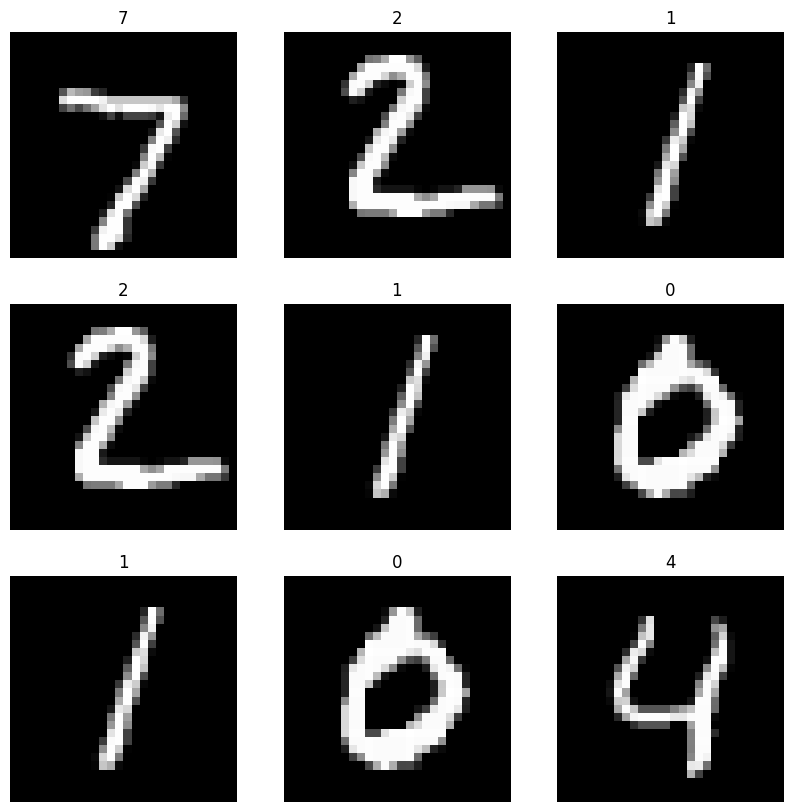

In [24]:
# display some rows and columns in dataset 
fig,ax=plt.subplots(3,3,figsize=(10,10))
for i in range(3):
    for j in range(3):
        ax[i][j].imshow(X[i+j].reshape(28,28),cmap='gray')
        ax[i][j].axis('off')
        ax[i][j].set_title(y[i+j])



In [25]:
# converting the X as integers they are in float as all the values 0 to 255
X=X.astype(int)
y=y.astype(int)

#### Spliting the dataset into train and test data taking 60000 image as testing data and 10000 image as test data randomly


In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7,random_state=42)

In [27]:
print(X_test.shape,X_train.shape,y_test.shape,y_train.shape)

(10000, 784) (60000, 784) (10000,) (60000,)


In [28]:
#RandomForest Alogorithm
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [29]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [30]:
y_pred=rf.predict(X_test)

In [31]:
score_rf=rf.score(X_test,y_test)
print("Test accuracy of the RandomForestClassifier",round(score_rf*100,2))

Test accuracy of the RandomForestClassifier 96.85


In [32]:
print(y_pred[10])

5


In [33]:
def display_af_train(index):
    fig,ax=plt.subplots(figsize=(2,2))
    ax.imshow(X_test[index].reshape(28,28),cmap='gray')
    ax.axis('off')
    ax.set_title(y_pred[index])

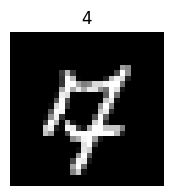

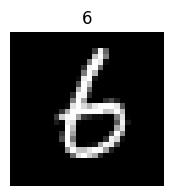

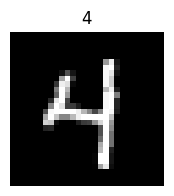

In [34]:
for i in range(3):
    display_af_train(i)

In [35]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       982
           1       0.99      0.98      0.99      1097
           2       0.97      0.96      0.96      1007
           3       0.94      0.96      0.95      1022
           4       0.97      0.96      0.97       968
           5       0.97      0.97      0.97       892
           6       0.98      0.98      0.98       974
           7       0.97      0.97      0.97      1099
           8       0.94      0.96      0.95       966
           9       0.96      0.96      0.96       993

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [37]:
joblib.dump(rf, r'D:\my_git\Handwriting-Recognition\Notebook\rf_model.joblib')

['D:\\my_git\\Handwriting-Recognition\\Notebook\\rf_model.joblib']

## CNN Model Training

In [292]:
X_trainx= X_train.reshape(60000,28,28)
X_testx= X_test.reshape(10000,28,28)

In [ ]:
X_train_normalized = X_trainx / 255.0
X_test_normalized = X_testx / 255.0

In [ ]:
#creating the sequential model
model = Sequential()

model.add(Flatten(input_shape=(28,28))) # Flatten layer to convert 28x28 input data into a flat 1D array
#1st layer
model.add(Dense(64))# its a first hidden layer with 64 neurons
model.add(Activation('relu')) #activation function to introduce non- linearity

#2nd layer
model.add(Dense(32))#second hidden layer with 32 neurons
model.add(Activation('relu'))

#3rd layer
model.add(Dense(32))# third hidden layer with 32 neurons
model.add(Activation('relu'))

#output layer
model.add(Dense(10))# output layer with 10 neurons
model.add(Activation('softmax'))

In [38]:
rf_model=joblib.load('rf_model.joblib')

In [50]:
img=cv2.imread(r'D:\my_git\Handwriting-Recognition\Data\test data\016.png')

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

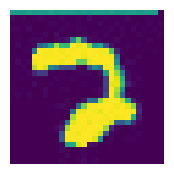

In [51]:
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(2,2))
plt.imshow(img_gray)
plt.axis('off')

In [52]:
img_gray=img_gray.reshape(1,784)

In [53]:
pred_mo=rf_model.predict(img_gray)

In [54]:
print(pred_mo)

[2]


In [290]:
# For multiple digit in a image

img=cv2.imread(r"D:\my_git\Handwriting-Recognition\Data\test data\010.png")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# blurred = cv2.GaussianBlur(gray, (5, 5), 0)
_,thres=cv2.threshold(gray,120,255,cv2.THRESH_BINARY)

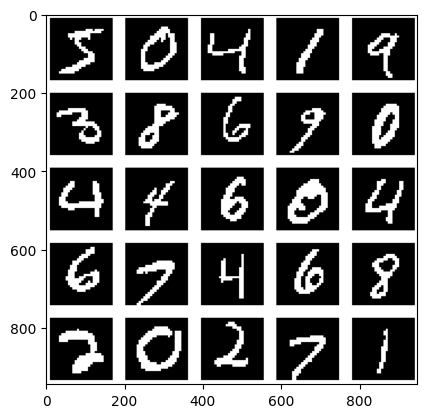

In [291]:
plt.imshow(thres,cmap='gray')

In [284]:
cont=cv2.findContours(thres,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[0]

In [ ]:
# pred_dig=[]
# for cnt in cont:
#         x, y, w, h = cv2.boundingRect(cnt)
#         cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 1)
        
#         digit = thres[y:y + h, x:x + w]
        
#         resized_digit = cv2.resize(digit, (18, 18))
#         padded_digit = np.pad(resized_digit, ((5, 5), (5, 5)), "constant", constant_values=0)
#         print(padded_digit.shape)
        
#         digit_flat = padded_digit.reshape(1, -1).astype('int')
#         pred = rf_model.predict(digit_flat)
#         final_pred = pred[0]

#         pred_dig.append([x, final_pred])
#         data = str(final_pred) 
#         print(f"Digit at x={x}: {final_pred}")

#         font = cv2.FONT_HERSHEY_SIMPLEX
#         fontScale = 0.5
#         color = (0, 0, 0)
#         thickness = 1
#         cv2.putText(img, data, (x, y - 5), font, fontScale, color, thickness)

(28, 28)
Digit at x=0: 2


Predicted sequence: [np.int64(2)]


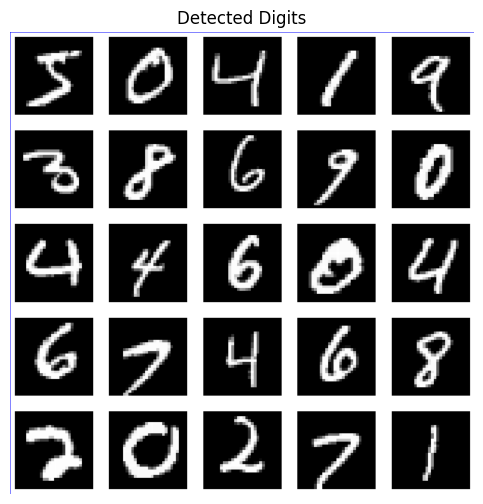

In [ ]:
# pred_dig.sort(key=lambda tup: tup[0])

# # Print final ordered sequence
# ordered_digits = [d for _, d in pred_dig]
# print("Predicted sequence:", ordered_digits)

# # Show final image
# import matplotlib.pyplot as plt
# plt.figure(figsize=(10, 6))
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.title("Detected Digits")
# plt.axis('off')
# plt.show()

In [287]:
# pad = 5
# for i, c in enumerate(cont):
#     x1 = max(x - pad, 0)
#     y1 = max(y - pad, 0)
#     x2 = min(x + w + pad, thres.shape[1])
#     y2 = min(y + h + pad, thres.shape[0])
#     roi = thres[y1:y2, x1:x2]
#     x, y, w, h = cv2.boundingRect(c)
#     roi_inv = cv2.bitwise_not(roi)
#     resized=cv2.resize(roi,(28,28))
#     # roi = thres[y:y+h, x:x+w]  # cropped digit

#     plt.figure(figsize=(2, 2))
#     plt.imshow(resized, cmap='gray')
#     plt.title(f"Contour #{i}  Size: {w}x{h}")
#     plt.axis('off')
#     plt.show()

In [288]:
pred_dig=[]
pad=5
img_copy = img.copy()
for c in cont:
    x,y,w,h=cv2.boundingRect(c)
    x1 = max(x - pad, 0)
    y1 = max(y - pad, 0)
    x2 = min(x + w + pad, thres.shape[1])
    y2 = min(y + h + pad, thres.shape[0])
    roi = thres[y1:y2, x1:x2]
    if w<5 or h<5:
        continue
    roi=thres[y:y+h,x:x+w]
    roi_inv = cv2.bitwise_not(roi)
    resized=cv2.resize(roi,(28,28))

    input_img=resized.reshape(1,-1).astype('int')
    pred = rf_model.predict(input_img)
    pred_dig.append(str(pred[0]))
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.putText(img_copy, str(pred), (x, y + h + 20),  
            cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    

In [289]:
print(pred_dig)

['3']


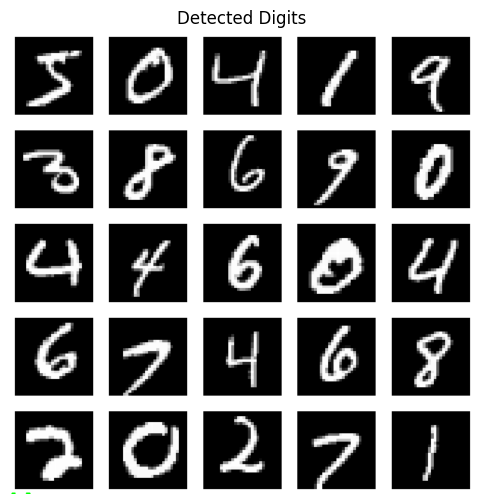

In [269]:
plt.figure(figsize=(10,6))
plt.imshow(cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB))
plt.title("Detected Digits")
plt.axis('off')
plt.show()